In [ ]:
라이브러리 포함

In [5]:
import cv2
import numpy as np
from matplotlib import pylab as pylab

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

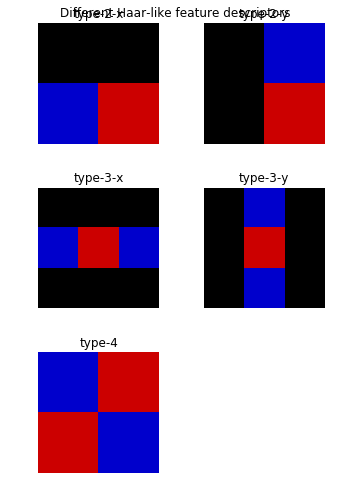

In [7]:
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

images = [np.zeros((2, 2)), np.zeros((2, 2)), \
          np.zeros((3, 3)), np.zeros((3, 3)), np.zeros((2, 2))]
feature_types = ['type-2-x', 'type-2-y', 'type-3-x', 'type-3-y', 'type-4']

fig, axes = pylab.subplots(3, 2, figsize=(5,7))
for axes, img, feat_t in zip(np.ravel(axes), images, feature_types):
    coordinates, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0, img.shape[0], img.shape[1], \
                                          coordinates, max_n_features=1, random_state=0, \
                                          color_positive_block=(1.0, 0.0, 0.0), \
                                          color_negative_block=(0.0, 0.0, 1.0), alpha=0.8)
    axes.imshow(haar_feature), axes.set_title(feat_t), axes.set_axis_off()
    
fig.suptitle('Different Haar-like feature descriptors')
pylab.axis('off'), pylab.tight_layout()
pylab.show()

In [19]:
# OpenCV 설치되어 있어야 함
opencv_haar_path = 'C:/opencv/sources/data/haarcascades/'
face_cascade = cv2.CascadeClassifier(opencv_haar_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(opencv_haar_path + 'haarcascade_eye.xml')

# eye_cascade = \ # 안경 착용 얼굴 검출
# cv2.CascadeClassifier(opencv_haar_path + 'haarcascade_eye_tree_eyeglasses.xml')
im = cv2.imread('../images/lena.jpg')

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.2, 5) # scaleFactor=1.2, minNbr=5
print(len(faces)) # 검출된 얼굴 개수 1

for (x,y,w,h) in faces:
    im1 = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]                                  
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray) # 검출 눈 좌표
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh), (0,255,0), 2)
        
cv2.imwrite('me_face_detected.jpg', img)

1
[[ 7 11 25 25]
 [33 12 22 22]]


True